In [1]:
# Importing necessary modules
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from keras.regularizers import l2
import matplotlib.pyplot as plt
from plot_keras_history import show_history
import mlflow
import mlflow.keras

2024-05-18 23:52:35.420267: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 23:52:35.423770: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 23:52:35.461116: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 23:52:36.132562: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
num_classes = 10

x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')


(50000, 32, 32, 3) train input samples
(10000, 32, 32, 3) test input samples
(50000, 10) train output samples
(10000, 10) test output samples


In [3]:
# Function to run 10 sub experiments
def run_sub_experiments(x_train,x_test,y_train,y_test):
    with mlflow.start_run(run_name="CIFAR10") as parent_run: 
        
    # Simple CNN with Only One Convolutional Layer
        with mlflow.start_run(run_name="Sub-Experiment-1", nested=True):
            mlflow.keras.autolog()
            
            model = keras.Sequential()
            model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            model.add(MaxPooling2D((2, 2)))
            model.add(Flatten())
            model.add(Dense(128, activation='relu'))
            model.add(Dense(10, activation='softmax'))
            model.summary()
            
            model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
            history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
            
            show_history(history)
            
            loss, acc = model.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model.save('models/model_1.keras')

        # CNN with Only three Convolutional Layers
        with mlflow.start_run(run_name="Sub-Experiment-2", nested=True):
            mlflow.keras.autolog()
            
            model1 = keras.Sequential()
            model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            model1.add(MaxPooling2D((2, 2)))
            model1.add(Conv2D(64, (3, 3), activation='relu'))
            model1.add(MaxPooling2D((2, 2)))
            model1.add(Conv2D(64, (3, 3), activation='relu'))
            model1.add(Flatten())
            model1.add(Dense(64, activation='relu'))
            model1.add(Dense(10, activation='softmax'))
            model1.summary()
            
            model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
            history1 = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
            
            show_history(history1)
            
            loss, acc = model1.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model1.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model1.save('models/model_2.keras')
    
        # CNN with dropout
        with mlflow.start_run(run_name="Sub-Experiment-3", nested=True):
            mlflow.keras.autolog()
        
            model2 = keras.Sequential()
            model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            model2.add(MaxPooling2D((2, 2)))
            model2.add(Dropout(0.25))
            model2.add(Conv2D(64, (3, 3), activation='relu'))
            model2.add(MaxPooling2D((2, 2)))
            model2.add(Dropout(0.25))
            model2.add(Conv2D(64, (3, 3), activation='relu'))
            model2.add(Flatten())
            model2.add(Dense(64, activation='relu'))
            model2.add(Dropout(0.5))
            model2.add(Dense(10, activation='softmax'))
            model2.summary()
            
            model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
            history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
            
            show_history(history2)
            
            loss, acc = model2.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model2.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model2.save('models/model_3.keras')
        
        # Using learning rates
        with mlflow.start_run(run_name="Sub-Experiment-4", nested=True):
            mlflow.keras.autolog()
            
            model3 = keras.Sequential()
            model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            model3.add(MaxPooling2D((2, 2)))
            model3.add(Conv2D(64, (3, 3), activation='relu'))
            model3.add(MaxPooling2D((2, 2)))
            model3.add(Flatten())
            model3.add(Dense(256, activation='relu'))
            model3.add(Dense(10, activation='softmax'))
            model3.summary()
            
            opt_new = keras.optimizers.SGD(learning_rate=0.1)
            model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
            history3 = model3.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

            show_history(history3)
            
            loss, acc = model3.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model3.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model3.save('models/model_4.keras')
            
        
        # Using l2 regularization
        with mlflow.start_run(run_name="Sub-Experiment-5", nested=True):
            mlflow.keras.autolog()
        
            model4 = keras.Sequential()
            model4.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(32, 32, 3)))
            model4.add(MaxPooling2D((2, 2)))
            model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
            model4.add(MaxPooling2D((2, 2)))
            model4.add(Flatten())
            model4.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
            model4.add(Dense(10, activation='softmax'))
            model4.summary()
            
            model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
            history4 = model4.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
            
            show_history(history4)
            
            loss, acc = model4.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model4.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model4.save('models/model_5.keras')
        
        
       
        
        
        



/home/dell/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

2024-05-18 23:52:56.723928: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3887 - loss: 1.7309 - val_accuracy: 0.5579 - val_loss: 1.2666
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5747 - loss: 1.2236 - val_accuracy: 0.5777 - val_loss: 1.2127
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6230 - loss: 1.0860 - val_accuracy: 0.6106 - val_loss: 1.1279
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6553 - loss: 0.9924 - val_accuracy: 0.6230 - val_loss: 1.0854
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6856 - loss: 0.9039 - val_accuracy: 0.6197 - val_loss: 1.1263
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7110 - loss: 0.8355 - val_accuracy: 0.6320 - val_loss: 1.1137
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7380 - loss: 0.7633 - val_accuracy: 0.6428 - val_loss: 1.0579
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7584 -

2024/05/18 23:57:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/dell/env/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


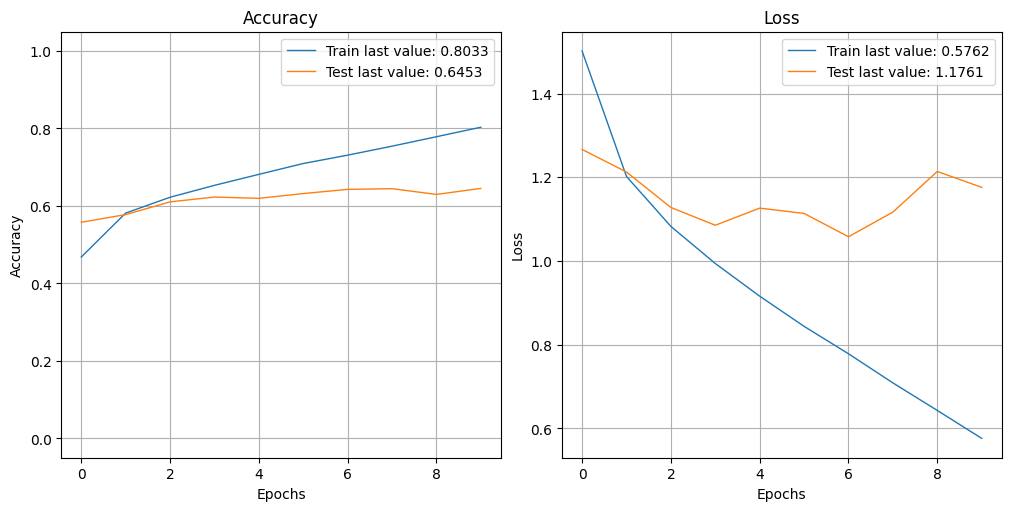

313/313 - 1s - 3ms/step - accuracy: 0.6453 - loss: 1.1761
Test accuracy: 64.53%


2024-05-18 23:57:28.469636: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 - 6s - 4ms/step - accuracy: 0.8384 - loss: 0.4756
Train accuracy: 83.84%


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

2024-05-18 23:57:36.154082: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.3397 - loss: 1.7988 - val_accuracy: 0.5696 - val_loss: 1.2137
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5824 - loss: 1.1882 - val_accuracy: 0.6034 - val_loss: 1.1182
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6568 - loss: 0.9784 - val_accuracy: 0.6522 - val_loss: 0.9890
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6995 - loss: 0.8646 - val_accuracy: 0.6937 - val_loss: 0.8826
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7330 - loss: 0.7752 - val_accuracy: 0.6893 - val_loss: 0.9203
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7550 - loss: 0.7104 - val_accuracy: 0.6712 - val_loss: 1.0216
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7756 - loss: 0.6502 - val_accuracy: 0.7129 - val_loss: 0.8625
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7899 -

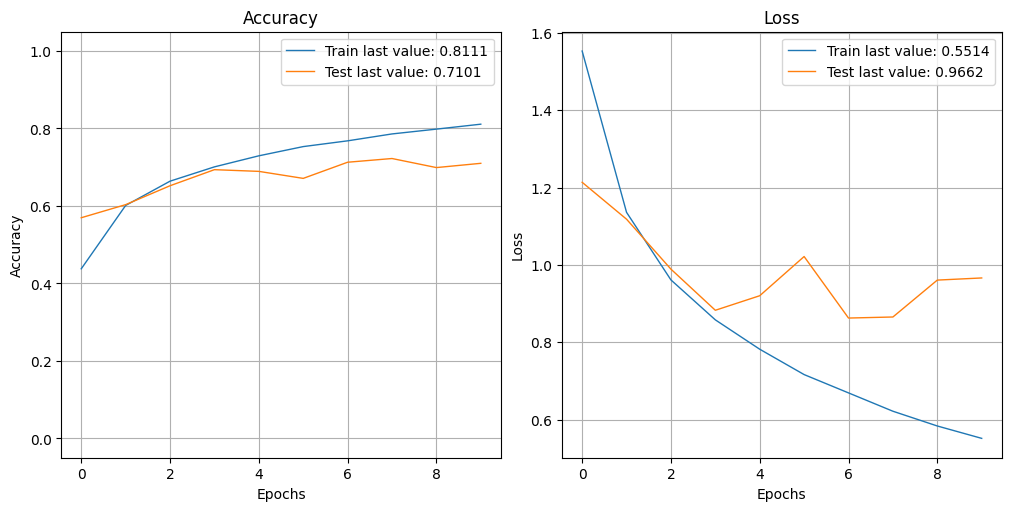

313/313 - 1s - 4ms/step - accuracy: 0.7101 - loss: 0.9662
Test accuracy: 71.01%


2024-05-19 00:02:18.430201: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 - 8s - 5ms/step - accuracy: 0.8407 - loss: 0.4624
Train accuracy: 84.07%


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

2024-05-19 00:02:27.952302: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.2762 - loss: 1.9383 - val_accuracy: 0.4867 - val_loss: 1.4573
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4877 - loss: 1.4423 - val_accuracy: 0.5667 - val_loss: 1.2192
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5472 - loss: 1.3064 - val_accuracy: 0.4641 - val_loss: 1.6566
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5762 - loss: 1.2397 - val_accuracy: 0.6091 - val_loss: 1.1342
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5902 - loss: 1.2157 - val_accuracy: 0.6508 - val_loss: 1.0753
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5876 - loss: 1.2399 - val_accuracy: 0.6309 - val_loss: 1.0796
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5864 - loss: 1.2595 - val_accuracy: 0.6219 - val_loss: 1.1469
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5900 -

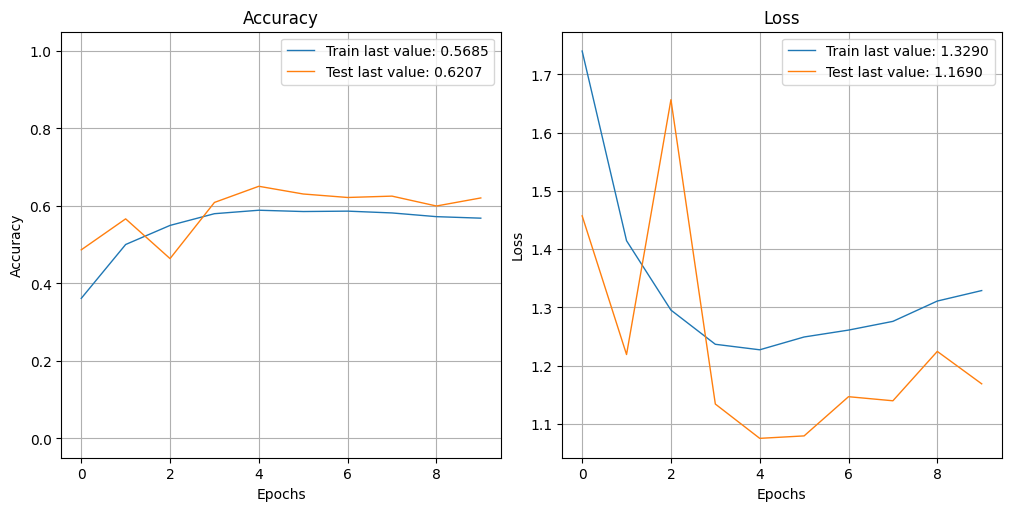

313/313 - 2s - 5ms/step - accuracy: 0.6207 - loss: 1.1690
Test accuracy: 62.07%
1563/1563 - 7s - 5ms/step - accuracy: 0.6374 - loss: 1.1102
Train accuracy: 63.74%


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,042 (2.33 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3149 - loss: 1.8828 - val_accuracy: 0.4783 - val_loss: 1.4851
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5625 - loss: 1.2291 - val_accuracy: 0.6215 - val_loss: 1.0813
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6536 - loss: 0.9845 - val_accuracy: 0.6196 - val_loss: 1.1055
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7161 - loss: 0.8049 - val_accuracy: 0.6397 - val_loss: 1.0629
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7712 - loss: 0.6548 - val_accuracy: 0.6555 - val_loss: 1.0922
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8190 - loss: 0.5193 - val_accuracy: 0.6634 - val_loss: 1.1228
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8643 - loss: 0.3867 - val_accuracy: 0.6610 - val_loss: 1.2543
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8973 -

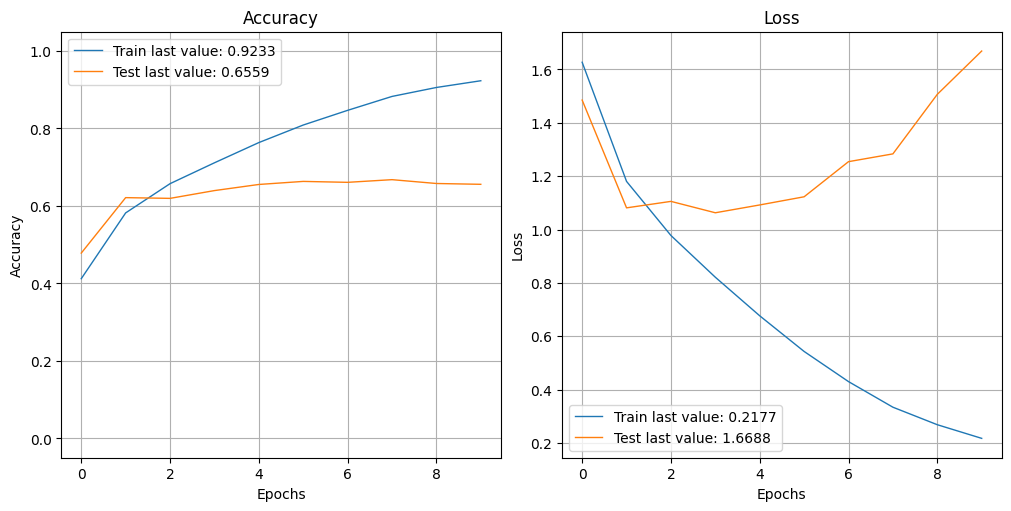

313/313 - 1s - 4ms/step - accuracy: 0.6559 - loss: 1.6688
Test accuracy: 65.59%
1563/1563 - 7s - 5ms/step - accuracy: 0.9385 - loss: 0.1799
Train accuracy: 93.85%


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3133 - loss: 2.1656 - val_accuracy: 0.4660 - val_loss: 1.7123
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4544 - loss: 1.7223 - val_accuracy: 0.4562 - val_loss: 1.7472
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4921 - loss: 1.6336 - val_accuracy: 0.5091 - val_loss: 1.5811
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5169 - loss: 1.5851 - val_accuracy: 0.3855 - val_loss: 2.0865
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5330 - loss: 1.5394 - val_accuracy: 0.4895 - val_loss: 1.6571
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5479 - loss: 1.5151 - val_accuracy: 0.5406 - val_loss: 1.5167
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.5518 - loss: 1.4959 - val_accuracy: 0.5544 - val_loss: 1.4774
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5641 -

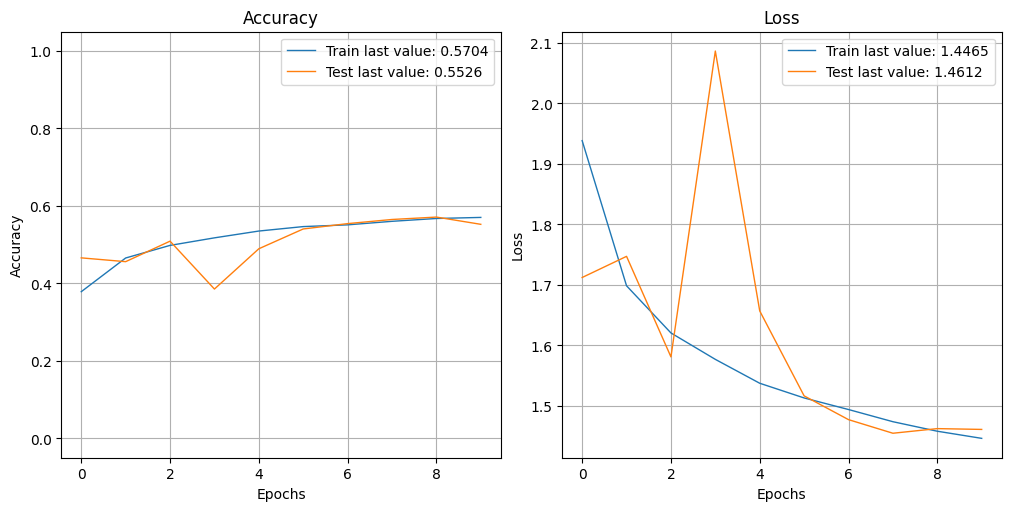

313/313 - 1s - 4ms/step - accuracy: 0.5526 - loss: 1.4612
Test accuracy: 55.26%
1563/1563 - 7s - 4ms/step - accuracy: 0.5643 - loss: 1.4391
Train accuracy: 56.43%


In [4]:
run_sub_experiments(x_train,x_test,y_train,y_test)    